In [8]:
import sys
sys.path.insert(0, '/Users/jetchung/Desktop/Github Repositories/3D-Assignment-Problem/3DAssignmentSolver')


from main import Solver
from gurobi_solver import GurobiSolver
from pulp_solver import PulpSolver
from utils import create_problems, benchmark

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
N = 20
num_problems = 10

problems = create_problems(N, num_problems, verbosity = False)

solver1 = Solver(learning_rate_scale="constant", algorithm="subgradient", beta=0, search_size=10, learning_rate=0.1, max_iterations=200, threshold=0.05)
solver2 = Solver(learning_rate_scale="1/k", algorithm="nesterov", beta=0.95, search_size=10, learning_rate=0.1, max_iterations=200, threshold=0.05)
solver3 = PulpSolver()
solver4 = GurobiSolver('/Users/jetchung/gurobi.json')


solvers = [solver1, solver2, solver3, solver4]

df = benchmark(problems, solvers, verbosity = False)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2471762


Academic license 2471762 - for non-commercial use only - registered to jo___@hertford.ox.ac.uk


KeyboardInterrupt: 

In [ ]:
df

,CustomSolver_1,CustomSolver_2,PulpSolver_3,GurobiSolver_4
1,0.333887,0.303588,4.631050,0.938856
2,0.142088,0.060015,6.087250,1.246400
3,0.057605,0.049507,1.876157,0.773337
4,0.153333,0.091631,2.007031,0.910995
5,0.139585,0.036446,1.720026,0.760750
6,0.067013,0.024554,1.642103,0.767072
7,0.153319,0.045797,4.315567,1.272807
8,0.159405,0.023755,2.036814,0.924801
9,0.448223,0.226367,2.026119,1.070560
10,0.164618,0.031340,1.939923,0.886482


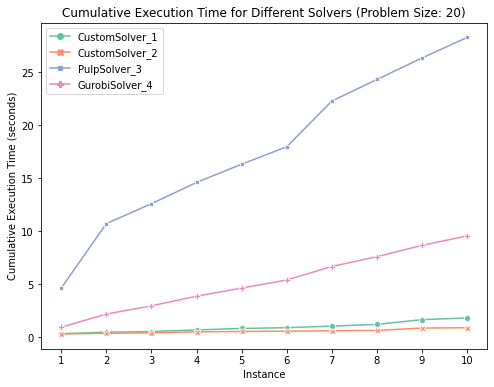

In [ ]:
plt.figure(figsize=(8, 6))

sns.lineplot(data=df.cumsum(), dashes=False, markers = True, palette="Set2")

plt.xlabel("Instance")
plt.xticks(np.arange(1, num_problems + 1, 1)) 
plt.ylabel("Cumulative Execution Time (seconds)")
plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
plt.legend()
plt.show()

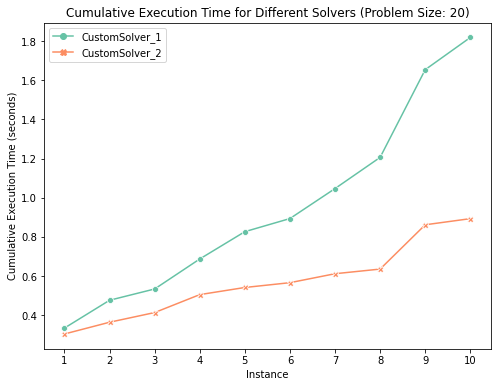

In [10]:
df_subset = df.iloc[:, :2] 

plt.figure(figsize=(8, 6))

sns.lineplot(data=df_subset.cumsum(), dashes=False, markers = True, palette="Set2")

plt.xlabel("Instance")
plt.xticks(np.arange(1, num_problems + 1, 1)) 
plt.ylabel("Cumulative Execution Time (seconds)")
plt.title(f"Cumulative Execution Time for Different Solvers (Problem Size: {N})")
plt.legend()
plt.show()

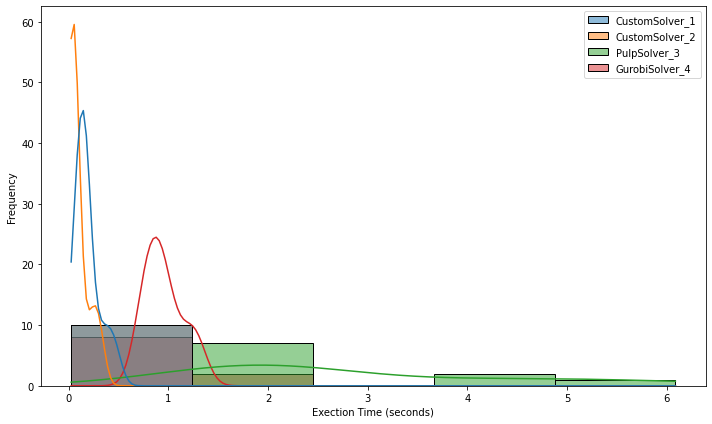

In [ ]:

plt.figure(figsize=(10, 6))
plt.xlabel("Exection Time (seconds)")
plt.ylabel("Frequency")
sns.histplot(data=df, bins=5, kde=True, alpha=0.5)
plt.tight_layout()
plt.show()